# Working with the mean

The mean is a vital measure of central tendency in data science, and we will now review its definition and properties. By definition the **mean** is 

> the sum of all the observations for that variable in the sample divided by the total number of observations

For a given sample, we sometimes refer to the mean as "xbar" and write it $\bar{x}$.  In line with the definition above we can write: 

$$
\bar{x} = \frac{1}{n}\sum^{i=n}_{i=1} x_i
$$

Taking the components in turn we have: 
- $x_i$ is the $i$th observation (so, just a number in the sample)
- $\sum$ tells us to *sum* these observations from the first ($i=1$) to the last ($i=n$) element in the sample
- $\frac{1}{n}$ that we multiply what we get by one divided by the sample size, which is equivalent to dividing by the sample size.

Thus, if our sample of values is

$$
1, 3, 3, 3, 5, 5, 7
$$

The mean is

$$
\bar{x} = \frac{1+3+3+3+5+5+7}{7}=3.86.
$$

## Properties of the Mean
Notice that the mean need not appear in the sample: for example, in our sample above 3.86 is not one of the elements.  Indeed, the mean need not be an integer, even if all elements of our sample are integers (consider, for example, the mean number of children in US families).

Second, the mean acts as a *smoother*.  What we mean by this is that it takes values throughout the distribution, and pushes together around the middle.  It does this by dividing out by the sample size.

Finally, the mean is *weighted sum*.  What we mean by this is that we add up all the various values in the sample but we weight the more common ones more heavily than the less common ones.  So, for example, we can rewrite our calculation above as

$$
\bar{x} = (1\times \frac{1}{7}) + (3\times\frac{3}{7}) + (5 \times \frac{2}{7}) + (7\times\frac{1}{7})=3.86
$$

The number 3 occurs three times in our sample, so it is weighted $\frac{3}{7}$, whereas the number 5 only appears twice, so it receives a weight $\frac{2}{7}$.  The fact that the mean is a type of weighted sum will be important later when we consider how the **Central Limit Theorem** applies to it.

## The mean versus the median
We have already mentioned that the mean is less robust than the median. By definition, of course, the median is in the "middle" of the sample distribution.  But the mean need not be.  To see these two things, consider the following example of a set of salaries in thousands of dollars per week:

$$
1,3,3,3,5,7,7,9,11
$$

The median of these numbers is 5 (so, \$5000 dollars a week).  The mean is 5.44.  These are fairly similar.  Now suppose the largest earner is replaced with an outlier: someone with a *very* high salary.  Then we have: 

$$
1,3,3,3,5,7,7,9,1100
$$

and the mean moves to 126.44.  That is, it is "pulled" by the outlier well away from the middle of the distribution: 126.44 is larger than all the values, bar one.  Meanwhile, the median *does not move*: it continues to be 5 and is "robust" to outliers in that sense.

## Skew 
In the example above, when the mean moved much higher than the median, it pulls the distribution of the sample out to the right (towards bigger numbers).  We say that if

- the histogram has one tail
- and the mean is far larger (to the right) of the median

The distribution has a **positive** or **right** skew.  Salaries and house prices are classic examples of things with a positive skew.  Take a look at the distribution of NYC salaries below.  The mean of this data is around $\$62000$ dollars, while the median is around $\$59000$ (as we saw above).  We can see the "right" tail of the distribution is pulled out away from the mass of the rest of the distribution, in a way that is not true on the lower end of the salary scale.

:::{figure-md} salary_skew
<img src="figures/salary_skew.png" alt="salary_skew" class="bg-white mb-1" width="350px">

Positive skew
:::

When the histogram has one tail, and the mean is far smaller (to the left) of the median, we say the distribution has a **negative** or **left** skew.  Something like the length of pregnancies in humans has a negative skew: some babies are born earlier (premature), but *everyone* is born by nine months. The nine months acts as an upper bound, and this brings the mean down below the median.

## Symmetry 

We will say that a distribution is **symmetric** if its median and mean are the same.  An obvious example, which we will return to below, is the *normal* distribution.  For the normal, the mean, median and mode are all equal, and it is unimodal (there is one peak).

:::{figure-md} norm_symm
<img src="figures/norm_symm.png" alt="norm_symm" class="bg-white mb-1" width="200px">

Normal distribution
:::

But symmetry can describe non-single peaked distributions too, like the *beta*.  Here is an example: 

:::{figure-md} beta_distn
<img src="figures/beta_distn.png" alt="beta_distn" class="bg-white mb-1" width="200px">

Beta distribution
:::

## Variability: the "Standard Deviation"

We have spent some time on averages, including the mean and the median. But we often want to also measure the *dispersion* or *spread* of data too.  One way to do this was the *Interquartile Range*, which told us how large the "middle" of the distribution was. 

Another popular measure is the **standard deviation** which tells us 

> on average, how far away are the data points from the sample mean?

It is mathematically defined as: 

$$
\mbox{SD} = \sqrt \frac{\sum(x-\bar{x})^2}{n}
$$

where:
- $x$ is each data point
- $\bar{x}$ is the mean of the sample
- $n$ is the sample size

The operation to calculate the standard deviation is simple: 
1. subtract the mean from each value of the data: $x-\bar{x}$
2. square the outcome of this subtraction: $(x-\bar{x})^2$
3. add all these squared values together: $\sum (x-\bar{x})^2$
4. divide this sum by $n$: $\frac{\sum (x-\bar{x})^2}{n}$
5. take the square root of this number: $\sqrt \frac{\sum(x-\bar{x})^2}{n}$


Python can calculate this very quickly using functions like `np.std()` in `numpy`.  In some textbooks, you will see a very slightly different formula:

$$
\mbox{SD} = \sqrt \frac{\sum(x-\bar{x})^2}{n-1}
$$

This differs to the previous formula in that the denominator is $n-1$, rather than $n$.  The purpose is to fix a bias that occurs in small samples. The use of $n-1$ is known as *Bessel's Correction*.  When the sample size is large, the difference between $n$ and $n-1$ is small, and thus the difference that Bessel's Correction makes is small. Some software implements Bessel's Correction automatically by default, but this is not true of `np.std()`---though you can add that correction if you need it.

## Comparing Variability
A larger standard deviation means the values are more spread out around the mean.  A smaller one means the values are more tightly packed around the mean.  Obviously, the mean will differ, depending on the data.  To see this, let's return to our OKCupid sample of men, and draw a histogram of their heights, while reporting the standard deviation of those heights.

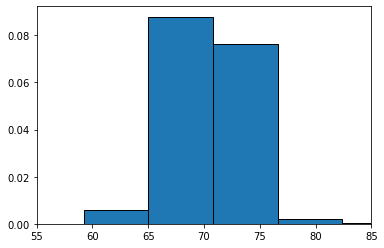

men's height SD = 3.1465319328144115 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

okc = pd.read_csv('data/okcupid_data_men.csv')
heights = okc["height"]
plt.hist(heights, ec="black", density=True)
plt.xlim(55,85)
plt.show()
print("men's height SD =",np.std(heights) ,"\n")

Alright, so the standard deviation of the men's heights is 3.15 (inches). What about the women? Let's load up the women's data: 

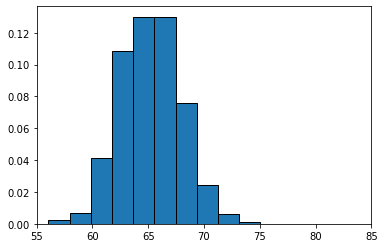

women's height SD = 2.837104605740282 



In [2]:
okcw = pd.read_csv('data/okcupid_data_women.csv')
heightsw = okcw["height"]
plt.hist(heightsw,ec="black", density=True)
plt.xlim(55,85)
plt.show()
print("women's height SD =",np.std(heightsw) ,"\n")

Their standard deviation is lower: 2.84 inches.  This makes sense, when we look at the spread of height values in comparing the men to the women: the men's distribution is a bit "fatter."

Notice that, as expected, the women's mean height is lower (they are shorter on average).  So the correct interpretation is that the women's heights are more tightly packed around a lower mean. 

## Standard Deviation and Variance
Above we said that the men's height standard deviation was 3.14 *inches*.  The units are deliberate: we use inches because the standard deviation is in whatever units the original measurement was in.  We are saying that, on average, the men's heights are 3.14 inches away from the mean man's height.

Intimately related to the standard deviation is another measure of spread: the **variance**.  Literally it is

> the square of the standard deviation.

Given the mathematical structure we gave earlier, this means the variance is

$$
\mbox{var} = \frac{\sum(x-\bar{x})^2}{n}
$$

note the absence of a square root sign.  We will not spend too much time on the definition of the variance and its importance, except to say that it represents a particularly important quantity that describes the shape of the distribution under study.  In terms of intuition, note that---as with the standard deviation---a larger variance implies a larger spread, while a smaller one implies a narrower one. 

Finally, note that the variance in measured in *units-squared*.  In our running heights example then, the variance of the men's heights is $3.14^2$ or 11.15 "inches squared". 

